Time Series - Data collected over a period of time. (ex. Population data, GDP Data)
Companies uses it for a lot of different ways in which they need to plan future marketting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
f_birth = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Time Series Analysis\daily-total-female-births-CA.csv',
                      index_col=[0],parse_dates=[0])   #squeeze=True-convert to series
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
type(f_birth)

pandas.core.frame.DataFrame

Converting data frame to a series using 'values' (taking it out series values into numpy array which algorithm needs to forecast) method.

In [9]:
series_value = f_birth.values

In [10]:
type(series_value)

numpy.ndarray

In [11]:
f_birth.size

365

In [12]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [13]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


To remove a last row from data frame as if its a outlier we can do
f_birth = f_birth[0:365]

Visualising the data

<AxesSubplot:xlabel='date'>

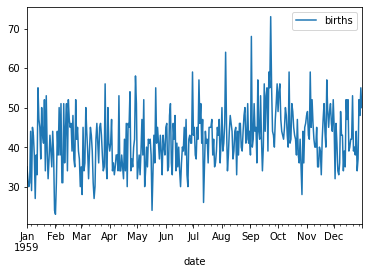

In [15]:
f_birth.plot()
# It basically indicates that there is a variation in data, we can see the peak & low point.
# There is a bit of trend here but not very specific looks like bit of a stationary series, it indicates the series which does
# not have any trend factor in it & it is like a constant series with constant mean & std deviation.
# The way we do that is to figure it out the difference between current term & previous term, we call it D (order of difference)
# Smoothing - It is basically taking up this values & smoothing out with the help of moving average
# Moving average - Taking a specific value & counts

Calculating moving average

In [16]:
f_birth_mean = f_birth.rolling(window = 20).mean()

<AxesSubplot:xlabel='date'>

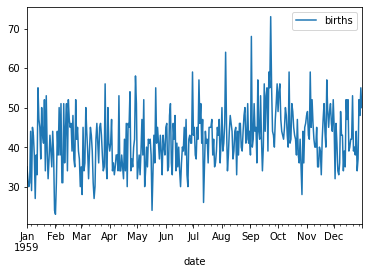

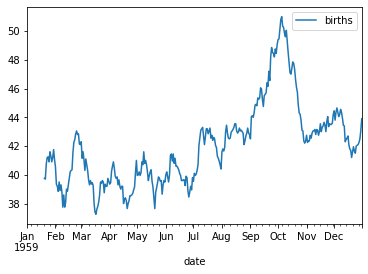

In [17]:
f_birth.plot()
f_birth_mean.plot()

Previous value is the best reflection of future value
Predicting the future value based on previous value (Naive Model)

In [18]:
value = pd.DataFrame(series_value)

In [20]:
birth_df = pd.concat([value, value.shift(1)], axis=1)

In [21]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [22]:
birth_df.columns = ['Actual_birth', 'Forecast_birth']

In [23]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


Calculating the error

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
birth_test = birth_df[1:]

In [31]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [32]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)

In [33]:
birth_error

84.22252747252747

In [34]:
np.sqrt(birth_error)

9.177283229394606

ARIMA (Model) - Autoregressive Integrated Moving Average

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

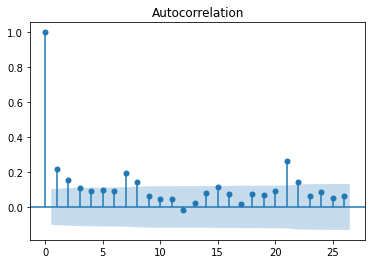

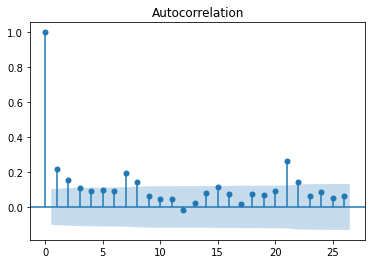

In [36]:
# plot_acf is to identify parameter Q
# ARIMA(p,d,q)

plot_acf(f_birth)

Here in this case corelation between level 0 (q) values is absolute, 3rd level is under the critical limit.

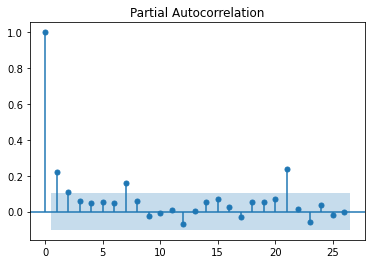

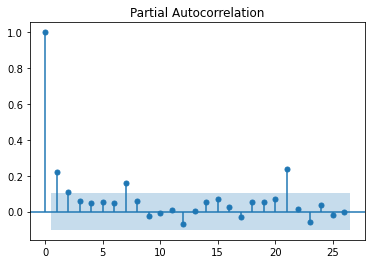

In [37]:
# To identify the value of p
plot_pacf(f_birth)

Here in this case corelation between level 0 (p) values is absolute, 2nd level is under the critical limit.

In [38]:
# p = 2,3,  d = 0,  q = 3,4
f_birth.size

365

Splitting the data into train & test

In [43]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

In [44]:
birth_train.size

330

In [45]:
birth_test.size

35

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [120]:
birth_model = ARIMA(birth_train, order = (3,1,4))

C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [121]:
birth_model_fit = birth_model.fit()

C:\Users\SHREE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [122]:
birth_model_fit.aic

2225.023042340784

In [123]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]

In [124]:
birth_forecast

array([43.89898728, 44.07566099, 44.41159239, 45.38794432, 45.5819599 ,
       45.53946615, 44.65729895, 44.24886551, 44.02608232, 44.75757761,
       45.33286898, 45.88165092, 45.47434169, 44.95007976, 44.22428508,
       44.33820535, 44.75319969, 45.61550635, 45.85473819, 45.72538556,
       44.93825816, 44.49466907, 44.36511289, 45.0236256 , 45.63174024,
       46.08503639, 45.72842085, 45.16701657, 44.53315026, 44.61594008,
       45.07685514, 45.85704414, 46.11308309, 45.9274557 , 45.20726392])

In [125]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [126]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.617752875728506